**BUSINESS CASE**

**"Build an AI model to classify rice diseases—leaf blast, bacterial blight, and brown spot—enhancing crop management and productivity."**

**Domain** **Analysis**

Rice is a staple food for over half of the global population, contributing significantly to food security and economic stability. However, rice
production is vulnerable to various diseases such as Leaf Blast, Brown Spot, and Bacterial Blight, which can severely impact yields, resulting
in financial losses and food shortages.

Traditional methods of disease detection involve manual inspection by agricultural experts, which is time-consuming, error-prone, and impractical
for large-scale farming. This creates an urgent need for an automated, scalable, and accurate solution to identify and manage rice leaf diseases
effectively.

Rice is highly susceptible to various diseases that primarily affect its leaves, stems, and grains. Among these, leaf diseases significantly impact photosynthesis, plant health, and yield. Factors such as environmental conditions, pathogen virulence, and agricultural practices contribute to the spread and severity of these diseases. Accurate and early identification is critical to mitigating their impact on crop production.


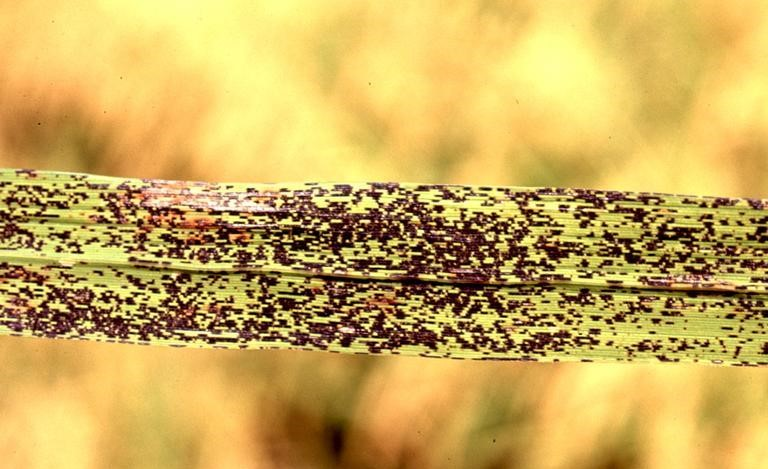

* **Leaf Smut**
Leaf Smut is caused by the fungal pathogen Magnaporthe oryzae, which is one of the most destructive diseases affecting rice crops worldwide. The disease begins with small, grayish, or whitish lesions on the leaf surface, which later expand into diamond-shaped spots with distinct brown margins and gray centers. If left untreated, the infection can spread to the leaf collars, stems, and even the panicles, causing neck rot. This progression weakens the plant significantly and disrupts photosynthesis, often resulting in severe yield losses. Environmental conditions such as high humidity, warm temperatures (24°C–28°C), and poor field drainage create favorable conditions for the pathogen. Excessive use of nitrogen fertilizers can also exacerbate the disease. Effective control measures include using resistant rice varieties, balanced fertilization, and improving field drainage. In severe cases, fungicides such as triazoles or strobilurins can be applied to manage the disease.



---

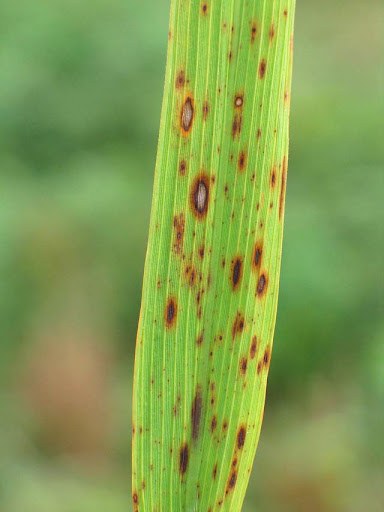

* **Brown Spot**
Brown Spot is a fungal disease caused by Bipolaris oryzae, which primarily affects rice leaves but can also spread to seeds, causing discoloration and poor germination. The disease is characterized by small, circular or oval spots with reddish-brown margins and grayish centers. These spots can expand, merge, and eventually cause significant leaf necrosis. Brown Spot thrives in warm temperatures (20°C–30°C) combined with high humidity, particularly in nutrient-deficient soils that lack nitrogen and potassium. Drought stress or inadequate irrigation can further aggravate its impact. The disease leads to poor grain quality and can result in yield losses ranging from 20% to 50% under severe conditions. Management strategies include seed treatments with fungicides like carbendazim, improving soil fertility through balanced nutrient application, and maintaining adequate water levels during the growing season. Additionally, destroying infected crop residues helps reduce the pathogen’s carryover to subsequent planting cycles.



---

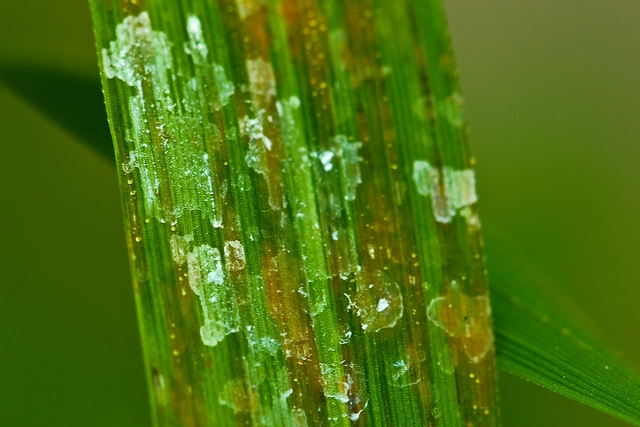

* **Bacterial Blight**
Bacterial Blight, caused by Xanthomonas oryzae pv. oryzae, is a severe bacterial disease of rice that can devastate entire fields. The disease begins with water-soaked lesions along the leaf margins, which gradually enlarge and turn yellow. These lesions often merge, causing extensive yellowing, wilting, and drying of the leaves. Infected plants may appear drought-stressed, but the symptoms result from bacterial infection rather than water scarcity. Bacterial Blight thrives in warm temperatures (25°C–34°C) and high humidity, especially during heavy rains or in fields with poor irrigation practices. Dense planting and excessive nitrogen fertilizer use can also increase the disease’s severity. Yield losses can vary from 10% to 70%, depending on the stage of infection and rice variety. Control measures include planting resistant rice varieties, maintaining proper plant spacing, and avoiding overuse of nitrogen fertilizers. Copper-based bactericides and biological control agents can also help manage the disease, alongside clean irrigation practices to limit the spread of bacteria.

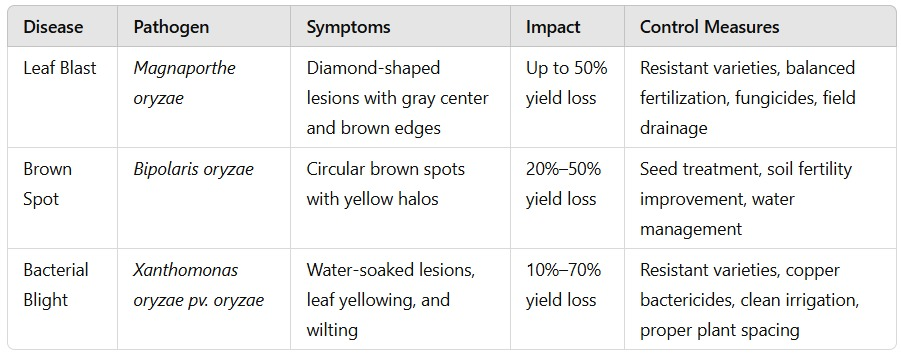

**Objective**

The primary objective of this project is to design a machine learning model capable of identifying and classifying rice leaf diseases (Leaf
Blast, Brown Spot, and Bacterial Blight) with high accuracy. By leveraging image recognition techniques, the project aims to empower farmers
and agribusinesses with an early warning system to detect diseases, enabling timely interventions to mitigate crop losses.


**Key Drivers for the Project**


1.Economic Impact:
* Global rice production losses due to diseases amount to billions annually. Early disease detection can reduce these losses significantly.

2.Precision Agriculture:
* Enhancing decision-making with AI tools aligns with the modern shift toward data-driven farming practices.

3.Scalability:
* An automated solution can be scaled to cover vast agricultural areas, reducing dependency on human labor.

4.Food Security:
* Safeguarding rice yields is critical for ensuring food supply to millions, particularly in rice-dependent economies.




**Proposed Solution**


The project will develop a convolutional neural network (CNN)-based model trained on an image dataset of rice leaves affected by diseases. Using state-of-the-art deep learning techniques and tools, the solution will:

* Classify images into three disease categories or healthy leaves.
* Provide accurate predictions with minimal false positives/negatives.
* Integrate with mobile or web platforms for real-time disease detection in the field.


**Benefits**

1.Operational Efficiency:
* Farmers save time and effort by eliminating manual inspection.

2.Cost Reduction:
* Early detection reduces the need for excessive pesticide use, lowering costs and environmental impact.

3.Improved Yield:
* Disease management ensures optimal productivity and grain quality.

4.Actionable Insights:
* Data-driven insights on disease patterns can help policymakers and agronomists plan preventive measures.

**Risks and Mitigation**

1.Risk: Small dataset size leading to overfitting.
* Mitigation: Use data augmentation and pre-trained models for transfer learning.

2.Risk: Variation in lighting and environmental conditions in real-world images.
* Mitigation: Train the model on diverse and augmented datasets to improve robustness.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Data Load

In [3]:
data1 = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/Bacterial leaf blight'
data2 = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/Brown spot'
data3 = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/Leaf smut'

Below code organizes a dataset of rice leaf disease images into structured directories for training, testing, and validation. It creates separate folders for each class ("Bacterial leaf blight," "Brown spot," and "Leaf smut") under train, test, and validation paths. The dataset is split into 70% training data and 30% testing data, with the latter further divided equally into test (15%) and validation (15%) subsets using train_test_split. The images are then moved to their respective directories for each class. This preprocessing step ensures the dataset is well-structured for supervised learning, facilitating model training and evaluation.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_path = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
validation_path = os.path.join(base_path, 'validation')

# Creating new directories for train, test, and validation
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)

# Define class names
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Create subdirectories for each class in train, test, and validation
for class_name in class_names:
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_path, class_name), exist_ok=True)

for class_name in class_names:
    class_folder = os.path.join(base_path, class_name)
    all_images = os.listdir(class_folder)

    # Split the data 70% for training and 30% for testing
    train_images, temp_images = train_test_split(all_images, test_size=0.3, random_state=42)

    # Split the 30% test data into 50% test and 50% validation (i.e 15% for validation)
    test_images, validation_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Move images to their respective directories
    for img in train_images:
        shutil.move(os.path.join(class_folder, img), os.path.join(train_path, class_name, img))

    for img in test_images:
        shutil.move(os.path.join(class_folder, img), os.path.join(test_path, class_name, img))

    for img in validation_images:
        shutil.move(os.path.join(class_folder, img), os.path.join(validation_path, class_name, img))

print("Data split complete!")

The below code uses TensorFlow's ImageDataGenerator to preprocess and normalize images from training, validation, and testing datasets, resizing them to 224x224 and generating batches with one-hot-encoded labels.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to train data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,  # Path to validation data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to test data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


Found 83 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


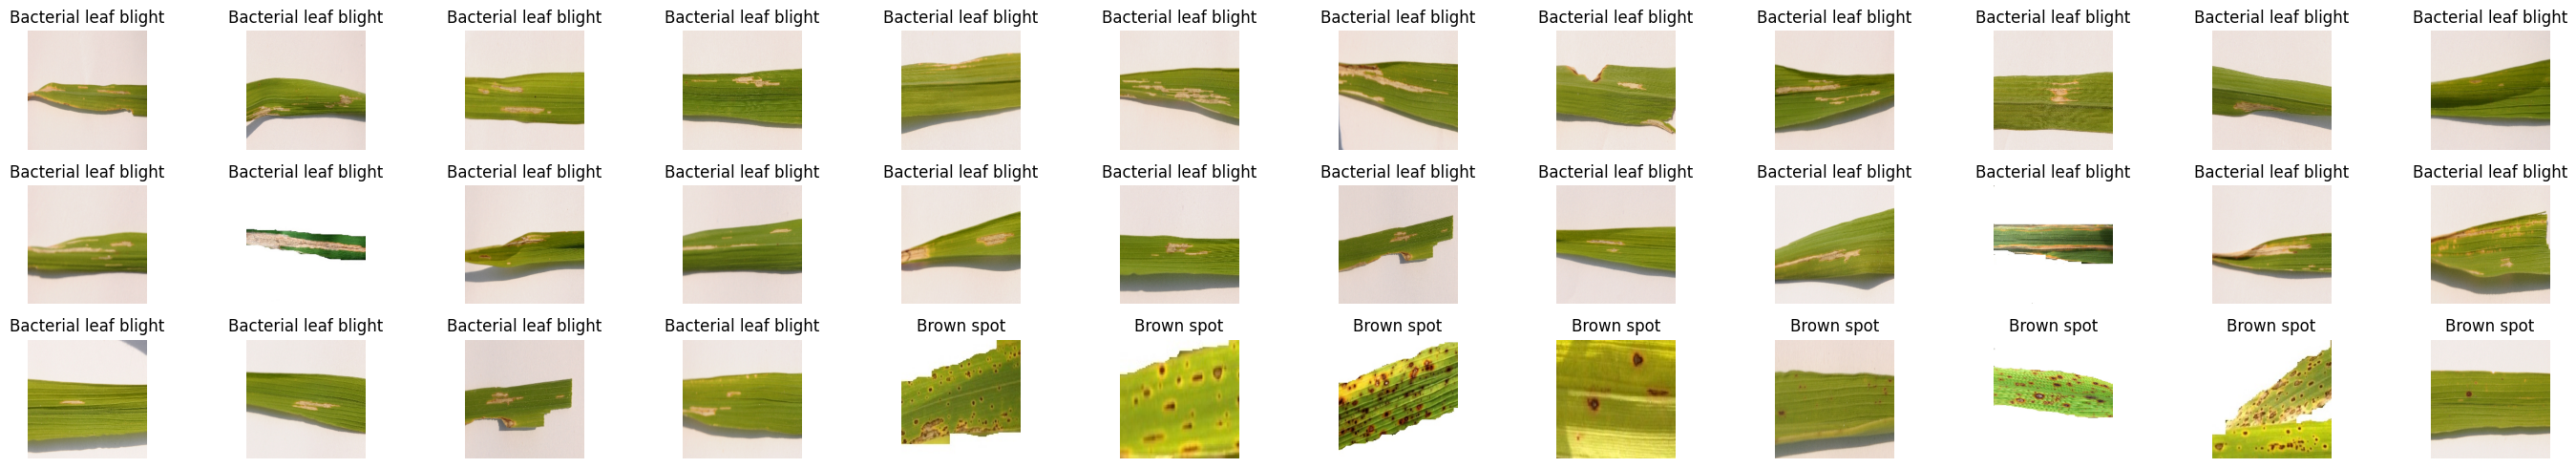

In [6]:
# Displaying images from training data

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

train_path = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/train'

class_names = os.listdir(train_path)
images = []
labels = []

# Loop through each class and load images
for label, class_name in enumerate(class_names):
    class_folder = os.path.join(train_path, class_name)
    image_files = os.listdir(class_folder)  # List image files in the class folder

    for img_file in image_files[:36]:  # Display first 36 images
        img_path = os.path.join(class_folder, img_file)

        # Load the image
        img = image.load_img(img_path, target_size=(224,224))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)

images = np.array(images)

# Display the images in a grid (3 rows and 12 columns)
fig = plt.figure(figsize=(28, 5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]))  # Display the image
    ax.axis('off')

    label = labels[i]
    ax.set_title(f"{class_names[label]}")  # Display class name as title

plt.tight_layout()
plt.show()

This code visualizes images from a training dataset stored in a directory, where each subdirectory represents a class label. It uses TensorFlow's image preprocessing utilities to load, resize (to 224x224), and normalize images by scaling pixel values to the [0, 1] range. Images are stored as a NumPy array, and their corresponding numeric class labels are also recorded. The script creates a grid layout using Matplotlib to display all images, with class names as titles above each image. This visualization helps verify the dataset's quality and distribution across classes, ensuring proper preparation for machine learning tasks.

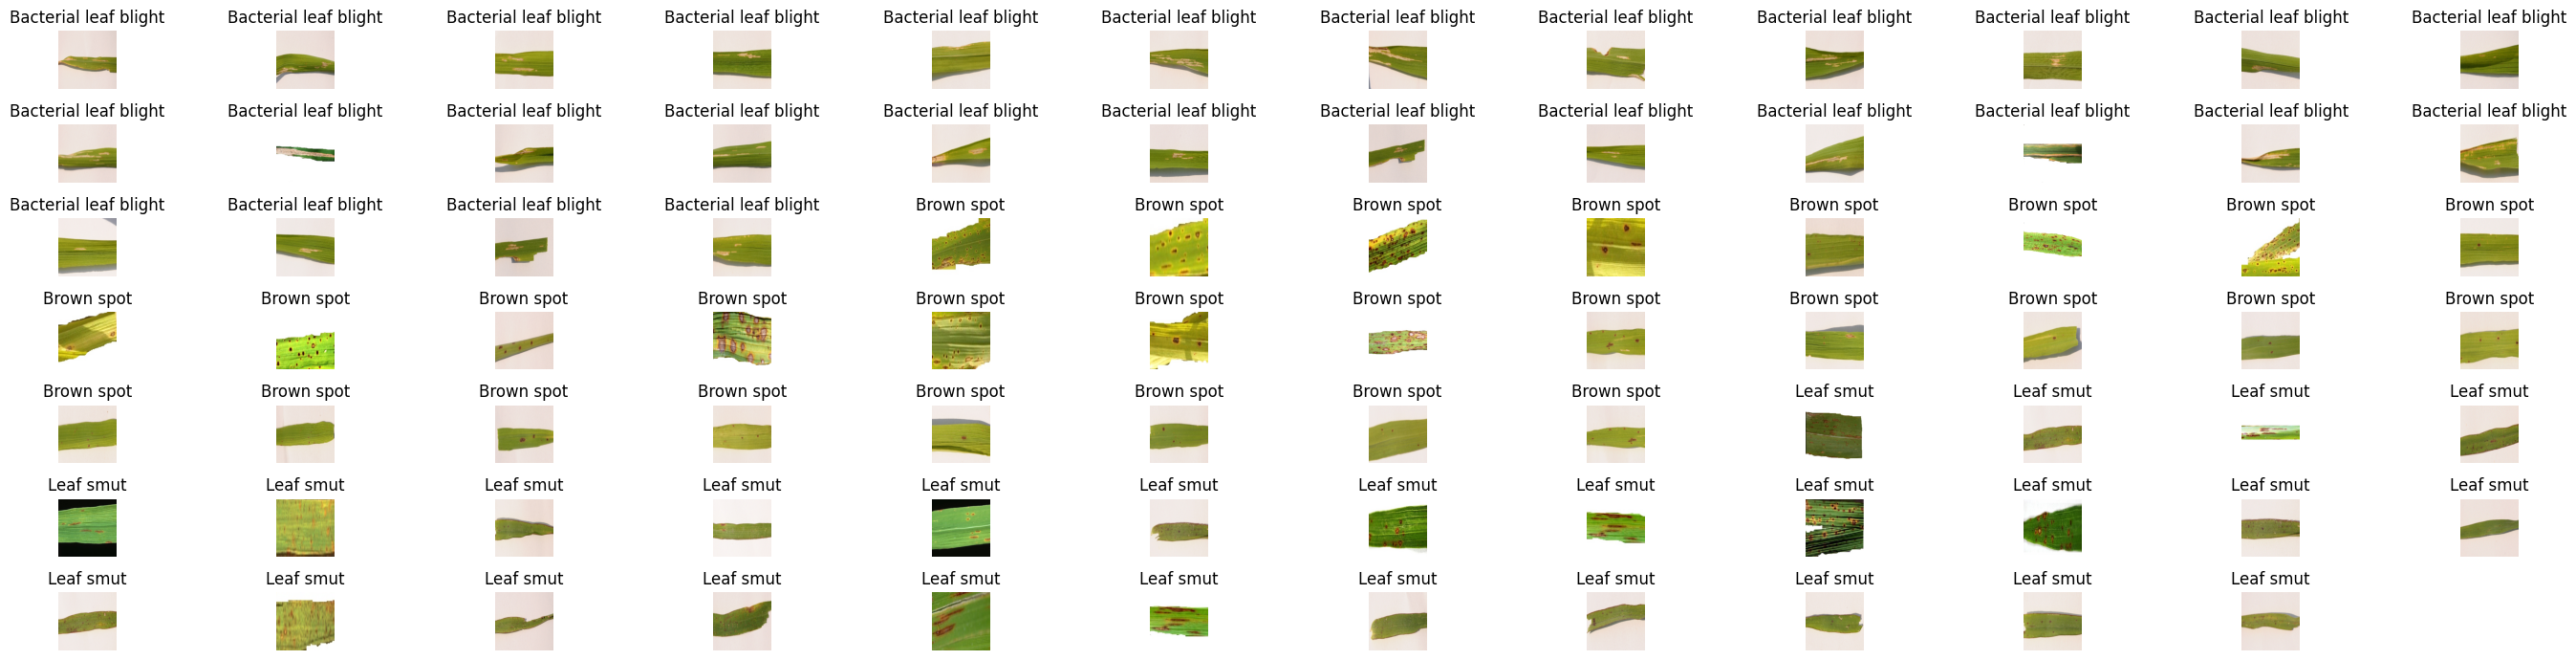

In [7]:
# display images from train data

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

train_path = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/train'

# List class directories in the train directory
class_names = os.listdir(train_path)

images = []
labels = []

# Loop through each class and load images
for label, class_name in enumerate(class_names):
    class_folder = os.path.join(train_path, class_name)
    image_files = os.listdir(class_folder)  # List image files in the class folder

    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)

        # Load the image
        img = image.load_img(img_path, target_size=(224,224))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)

# Convert the images list to a numpy array
images = np.array(images)

fig = plt.figure(figsize=(28, 7))

# Display each image in a grid
for i in range(len(images)):
    ax = fig.add_subplot(7, 12, i + 1, xticks=[], yticks=[])   # (for all 83 images, we can use 7 rows and 12 columns)
    ax.imshow(np.squeeze(images[i]))  # Display the image
    ax.axis('off')

    # Set the class label as the title
    label = labels[i]
    ax.set_title(f"{class_names[label]}")

plt.tight_layout()
plt.show()

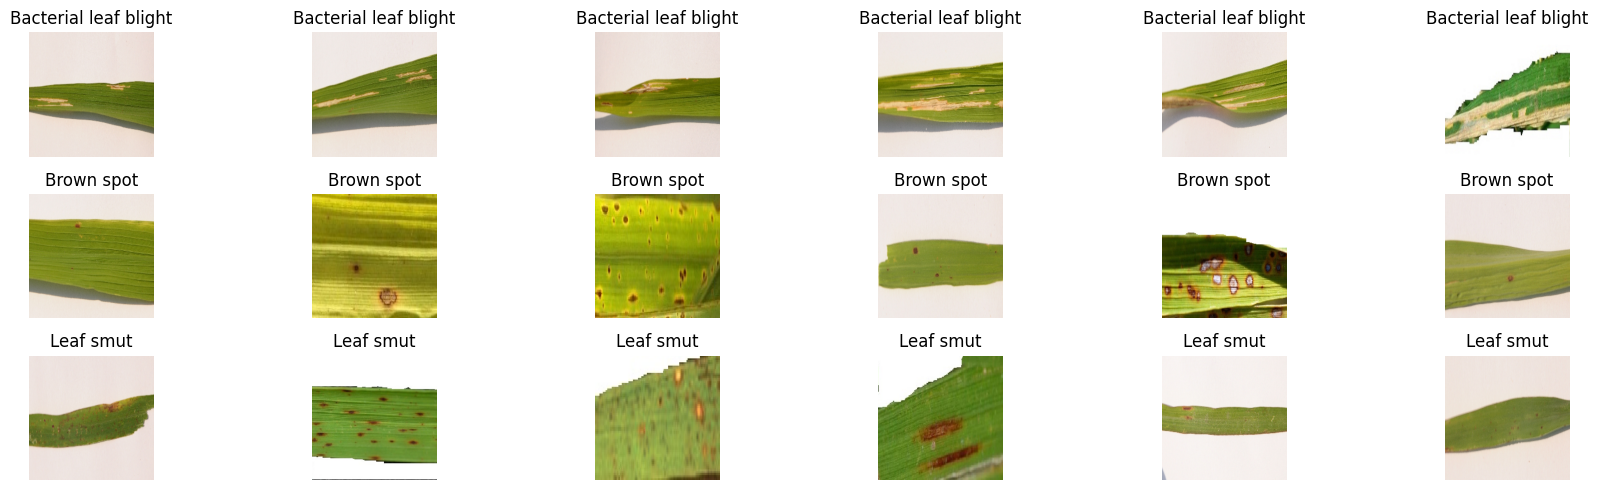

In [8]:
# display images for test data

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

test_path = '/content/drive/MyDrive/JupyterFiles/INTERNSHIP/test'

# List class directories in the test directory
class_names = os.listdir(test_path)

images = []
labels = []

# Loop through each class and load images
for label, class_name in enumerate(class_names):
    class_folder = os.path.join(test_path, class_name)
    image_files = os.listdir(class_folder)

    for img_file in image_files[:30]:
        img_path = os.path.join(class_folder, img_file)

        img = image.load_img(img_path, target_size=(224,224))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)

# Convert the images list to a numpy array
images = np.array(images)

# Display the images in a grid (3 rows and 6 columns)
fig = plt.figure(figsize=(18, 5))

for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]))  # Display the image
    ax.axis('off')

    # Set the class label as the title
    label = labels[i]
    ax.set_title(f"{class_names[label]}")

plt.tight_layout()
plt.show()


In [9]:
# Model Creation

from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(224,224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training Model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 0.2581 - loss: 1.9949 - val_accuracy: 0.3333 - val_loss: 1.5256
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.3386 - loss: 1.4665 - val_accuracy: 0.3333 - val_loss: 1.3752
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4133 - loss: 1.3606 - val_accuracy: 0.3889 - val_loss: 1.3595
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4673 - loss: 1.3420 - val_accuracy: 0.3889 - val_loss: 1.3487
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4357 - loss: 1.3296 - val_accuracy: 0.3889 - val_loss: 1.3204
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.5531 - loss: 1.2386 - val_accuracy: 0.3333 - val_loss: 1.2683
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6220 - loss: 1.1781 - val_accuracy: 0.5556 - val_loss: 1.2686
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5345 - loss: 1.1678 - val_accuracy: 0.4444 - val_loss: 1.1847
Epoch 9/15
3/3 ━━━

The below code dynamically creates a grid of subplots to visualize a random sample of test images, along with their predicted and true class labels. It calculates the grid size based on the number of samples (sample_size), ensuring an optimal layout with up to six columns and the necessary number of rows. Each image is displayed with its predicted label and true label as the title, where the title color is blue for correct predictions and red for incorrect ones. Any unused subplots are hidden for a clean presentation, and the layout is adjusted with padding to prevent overlap. This visualization provides an intuitive way to evaluate model predictions and identify errors directly from the test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


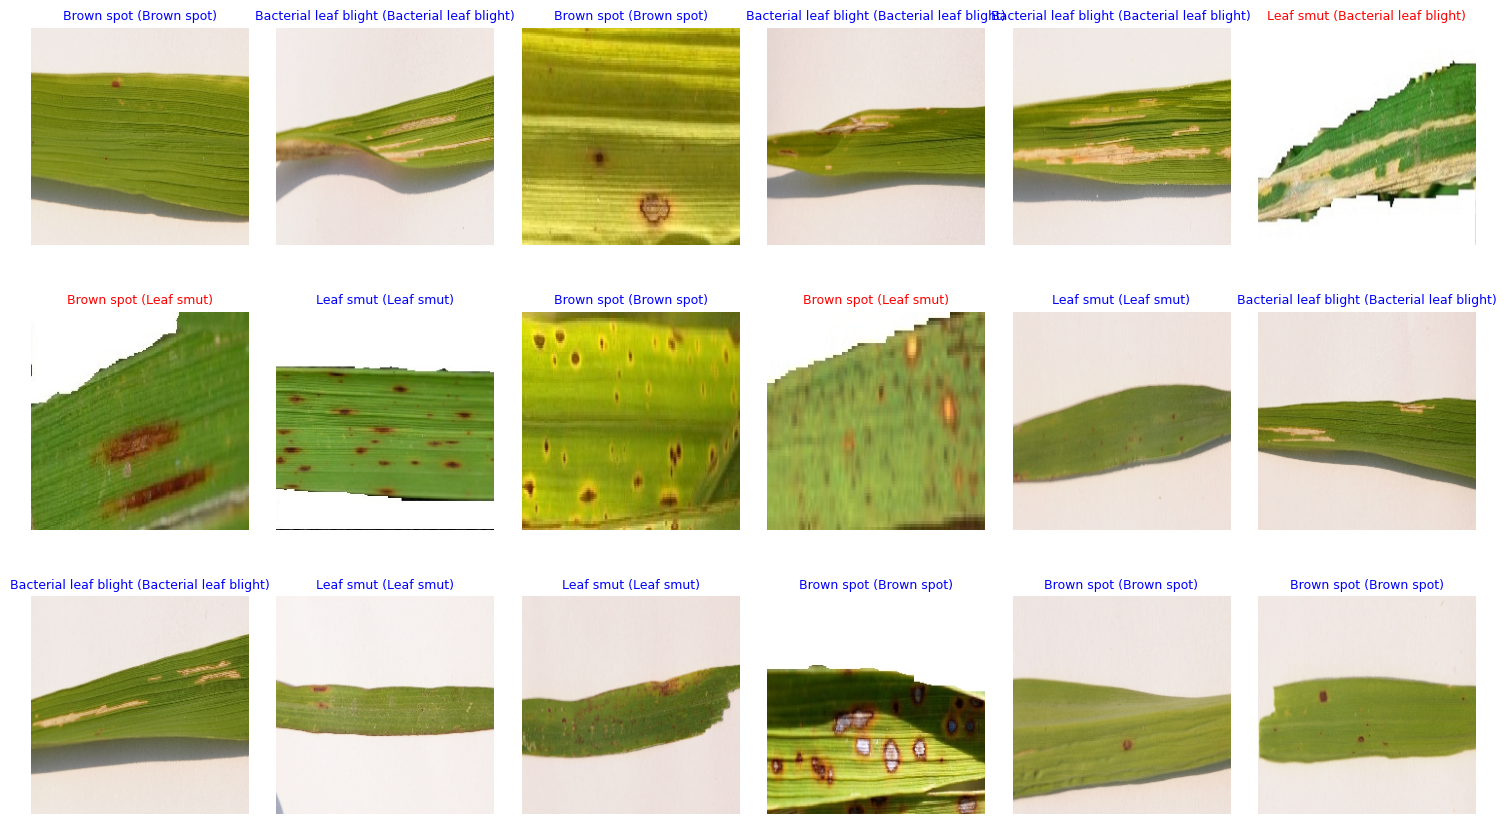

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# test_generator is used to load test data
X_test, y_test = next(test_generator)
y_hat = model.predict(X_test)  # Model predictions

class_labels = list(test_generator.class_indices.keys())

sample_size = X_test.shape[0]  # Number of samples in the batch

# Calculate grid size dynamically (e.g., 3 rows x 6 columns for 18 samples)
rows = (sample_size // 6) + (sample_size % 6 > 0)  # Number of rows needed
cols = min(6, sample_size)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten for easier indexing

# Plot the samples
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=sample_size, replace=False)):
    ax = axes[i]
    ax.imshow(X_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title(
        "{} ({})".format(class_labels[pred_idx], class_labels[true_idx]),
        color=("blue" if pred_idx == true_idx else "red"),
        fontsize=9  # Reduced font size to prevent overlap
    )
    ax.axis('off')  # Remove axes for better visualization

# Hide any unused subplots if present
for ax in axes[sample_size:]:
    ax.axis('off')

plt.tight_layout(pad=2.0)  # Add padding to ensure enough space between subplots
plt.show()

In [12]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - accuracy: 0.6111 - loss: 0.9814
Validation Loss: 0.9813818335533142
Validation Accuracy: 0.6111111044883728


In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step - accuracy: 0.8333 - loss: 1.1014
Test Loss: 1.1014
Test Accuracy: 83.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


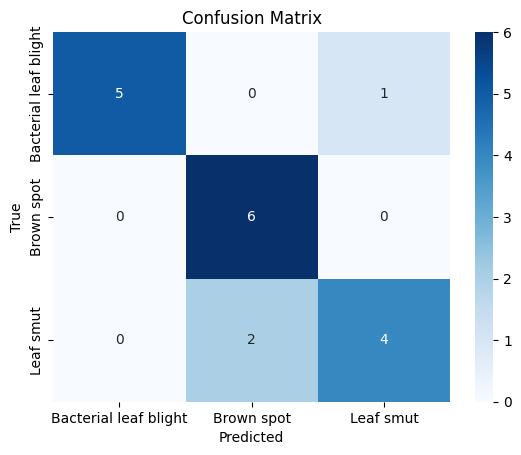

                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      0.83      0.91         6
           Brown spot       0.75      1.00      0.86         6
            Leaf smut       0.80      0.67      0.73         6

             accuracy                           0.83        18
            macro avg       0.85      0.83      0.83        18
         weighted avg       0.85      0.83      0.83        18



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming y_test contains true labels and y_pred contains predicted labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
# Testing unseen data

In [16]:
import tensorflow as tf

# Load and preprocess the image
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/JupyterFiles/INTERNSHIP/test/Bacterial leaf blight/DSC_0401.JPG", target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Make predictions
predictions = model.predict(img_array)

# Define the class labels in the same order as used during model training
class_names = ["Bacterial Leaf Blight", "Leaf Smut", "Brown Spot"]

# Get the predicted class index
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class index: 0
Predicted class name: Bacterial Leaf Blight


In [17]:
import tensorflow as tf

# Load and preprocess the image
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/JupyterFiles/INTERNSHIP/leaf smut img.jpg", target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Make predictions
predictions = model.predict(img_array)

# Define the class labels in the same order as used during model training
class_names = ["Bacterial Leaf Blight", "Leaf Smut", "Brown Spot"]

# Get the predicted class index
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class index: 1
Predicted class name: Leaf Smut


In [18]:
import tensorflow as tf

# Load and preprocess the image
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/JupyterFiles/INTERNSHIP/brown spot img.jpg", target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Make predictions
predictions = model.predict(img_array)

# Define the class labels in the same order as used during model training
class_names = ["Bacterial Leaf Blight", "Leaf Smut", "Brown Spot"]

# Get the predicted class index
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class index: 1
Predicted class name: Leaf Smut


In [20]:
import tensorflow as tf

# Load and preprocess the image
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/JupyterFiles/INTERNSHIP/test/Brown spot/DSC_0325.JPG", target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Make predictions
predictions = model.predict(img_array)

# Define the class labels in the same order as used during model training
class_names = ["Bacterial Leaf Blight", "Leaf Smut", "Brown Spot"]

# Get the predicted class index
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted class index: 1
Predicted class name: Leaf Smut


In [21]:
import tensorflow as tf

# Load and preprocess the image
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/JupyterFiles/INTERNSHIP/test/Leaf smut/DSC_0502.jpg", target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Make predictions
predictions = model.predict(img_array)

# Define the class labels in the same order as used during model training
class_names = ["Bacterial Leaf Blight", "Leaf Smut", "Brown Spot"]

# Get the predicted class index
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class index: 1
Predicted class name: Leaf Smut


**Conclusion**

This project will transform traditional rice farming practices by providing an AI-powered disease detection system. It aligns with the goals
of precision agriculture, promoting sustainable farming practices and ensuring food security for millions. By leveraging cutting-edge machine
learning techniques, this solution promises a measurable impact on the agricultural industry.